# Data Retrieval

This section focuses on retrieving historical stock data and ensuring it is clean and ready for analysis. I selected ten stocks across different industries, including **NFLX, JNJ, PG, MCD, AMZN, BAC, JPM, BSX, NVDA, and MSFT**, to provide a diversified dataset suitable for portfolio construction.

The historical data for each stock was retrieved from Yahoo Finance  covering the period from **2020 to 2024** using the `yfinance` package.Additionally, the index was converted into a datetime column to facilitate temporal operations, and any multi-level column index was removed to simplify the structure.

Once the data for all ten stocks was obtained, it was combined into a single long-format DataFrame using the concat() function. This format enables more efficient filtering, grouping, and visualization in later steps. The final concatenated dataset was saved as a CSV  file for (stock_data_long_format.csv) record-keeping and reproducibility.

To ensure the data was clean and consistent:
- I checked for missing values using `df_long.isnull().sum()` and found no missing entries.
- I verified there were no duplicate rows using `df_long.duplicated().sum()`.

Overall, this step successfully prepared a reliable and clean dataset, providing a solid foundation for subsequent exploration, strategy development, and portfolio analysis.

### Importing Required Packages

The code begins by importing essential libraries:

`numpy` and P`pandas` are used for numerical operations and data manipulation.

`matplotlib.pyplot` and `seaborn` support data visualization.

`yfinance` is used to retrieve historical financial data from Yahoo Finance.

`scipy.optimize.minimize` will later support portfolio optimisation.

A visual theme "**ggplot**" is applied to unify the style of plots.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import yfinance as yf
from scipy.optimize import minimize

plt.style.use("ggplot")

### Defining the List of Stock Tickers
A list of ten stock tickers is defined, representing a diversified portfolio of well-known companies across different industries. 

These include:
NFLX, JNJ, PG, MCD, AMZN, BAC, JPM, BSX, NVDA, and MSFT.

An empty list groups is initialized to store the data retrieved for each ticker.

In [2]:
tickers = ["NFLX", "JNJ", "PG", "MCD", "AMZN", "BAC", "JPM", "BSX", "NVDA", "MSFT"]
groups = []

### Retrieving and Annotating Stock Data
A for loop iterates through the ticker list and downloads each stock’s daily price data using the yfinance.download() function for the specified date range. The following transformations are applied to each stock's DataFrame:

A new column called **Date** is created to convert the index into a datetime format.

The multilevel column index is removed to simplify the structure.

A new column named **Ticker** is added to retain the company name for later grouping or filtering.

Each stock's DataFrame is appended to the groups list.

This ensures all individual stock datasets are properly labeled and structured for merging.

In [3]:
for ticker in tickers:
    data = yf.download(ticker, start="2020-01-01", end="2024-12-31")
    data["Date"] = pd.to_datetime(data.index) 
    data.columns = data.columns.droplevel(1)  
    data["Ticker"] = ticker 
    groups.append(data)

/tmp/ipykernel_9768/481903327.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2020-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_9768/481903327.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2020-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_9768/481903327.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2020-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_9768/481903327.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2020-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


### Merging All Stock Data into One DataFrame
All individual stock DataFrames are concatenated into a single long-format DataFrame called df_long. 

This format includes one row per stock per day, with key columns like:
**Open, High, Low, Close, Volume, and Adj Close**

Date and Ticker to identify the specific stock and time

A snapshot of the DataFrame is displayed using .head() to confirm the structure.

The final merged dataset is saved to a CSV file called "stock_data_long_format.csv" for backup or external use.



In [4]:
df_long = pd.concat(groups)
print(df_long.head())

df_long.to_csv("stock_data_long_format.csv")

Price            Close        High         Low        Open   Volume  \
Date                                                                  
2020-01-02  329.809998  329.980011  324.779999  326.100006  4485800   
2020-01-03  325.899994  329.859985  325.529999  326.779999  3806900   
2020-01-06  335.829987  336.359985  321.200012  323.119995  5663100   
2020-01-07  330.750000  336.700012  330.299988  336.470001  4703200   
2020-01-08  339.260010  342.700012  331.049988  331.489990  7104500   

Price            Date Ticker  
Date                          
2020-01-02 2020-01-02   NFLX  
2020-01-03 2020-01-03   NFLX  
2020-01-06 2020-01-06   NFLX  
2020-01-07 2020-01-07   NFLX  
2020-01-08 2020-01-08   NFLX  


The resulting DataFrame contains clean and well-labeled rows. Each row shows the price data, the corresponding date, and the ticker symbol, which confirms the success of both data collection and formatting steps.
This structured long-format dataset forms the basis for all further analysis, including backtesting, portfolio construction, and optimisation.

### Data Cleaning - Checking for Missing Values
The code uses the `isnull().sum()` function to check whether any column contains missing values. 
The result confirms that there are no missing values in any of the columns, including: **Price, Close, High, Low, Open, Volume, Date, and Ticker.**

This indicates that the data retrieved from Yahoo Finance is complete and reliable, and no imputation or filling is required.

In [5]:
print(df_long.isnull().sum())

Price
Close     0
High      0
Low       0
Open      0
Volume    0
Date      0
Ticker    0
dtype: int64


### Data Cleaning - Checking for Duplicate Rows
The function `duplicated().sum()` is used to count the number of duplicated records in the dataset. 

The result returns 0, meaning there are no repeated rows in the combined dataset.


In [6]:
df_long.duplicated().sum()

np.int64(0)

# Data Exploration
This section aims to convert the cleaned long-format stock data into a wide format for easier analysis and visualisation. It includes displaying the head and tail of the closing prices and plotting the price trends over time.

In [7]:
df = pd.read_csv("stock_data_long_format.csv", dayfirst=True)

### Pivoting & Previewing the data
The dataset was reshaped using a pivot operation, setting dates as the index and stock tickers as columns, with closing prices as the values. This format is essential for plotting and time series analysis.

The head and tail of the pivoted DataFrame were displayed to confirm the structure and date coverage. 

In [8]:
df_pivot = df.pivot(index="Date", columns="Ticker", values="Close")
df_pivot

portfolio_stocks = df_pivot.columns[:10] 
df_pivot = df_pivot[portfolio_stocks]

weights = np.ones(10) / 10

print(df_pivot.head())  
print(df_pivot.tail())  

Ticker           AMZN        BAC        BSX         JNJ         JPM  \
Date                                                                  
2020-01-02  94.900497  31.092318  45.330002  124.983696  120.733574   
2020-01-03  93.748497  30.446743  44.980000  123.536644  119.140343   
2020-01-06  95.143997  30.403116  45.349998  123.382561  119.045570   
2020-01-07  95.343002  30.202465  45.400002  124.136009  117.021721   
2020-01-08  94.598503  30.507799  45.639999  124.118874  117.934624   

Ticker             MCD        MSFT        NFLX      NVDA          PG  
Date                                                                  
2020-01-02  176.811615  153.042297  329.809998  5.971746  107.748276  
2020-01-03  176.186462  151.136658  325.899994  5.876163  107.023598  
2020-01-06  178.167755  151.527328  335.829987  5.900805  107.172012  
2020-01-07  178.431946  150.145737  330.750000  5.972244  106.508453  
2020-01-08  181.320221  152.537323  339.260010  5.983446  106.962463  
Ticke

### Saving the data
The wide-format DataFrame was saved to a new CSV file for future reference.

The date index was also checked to ensure it is sorted in ascending order.

In [9]:
df_pivot.to_csv("stock_data_pivot.csv")

print(df_pivot.index.is_monotonic_increasing)

True


### Plotting stock prices
A single line plot was created to visualise the closing prices of all ten stocks from 2020 to 2024. This helps identify overall trends and volatility across the portfolio.

<Figure size 1400x700 with 0 Axes>

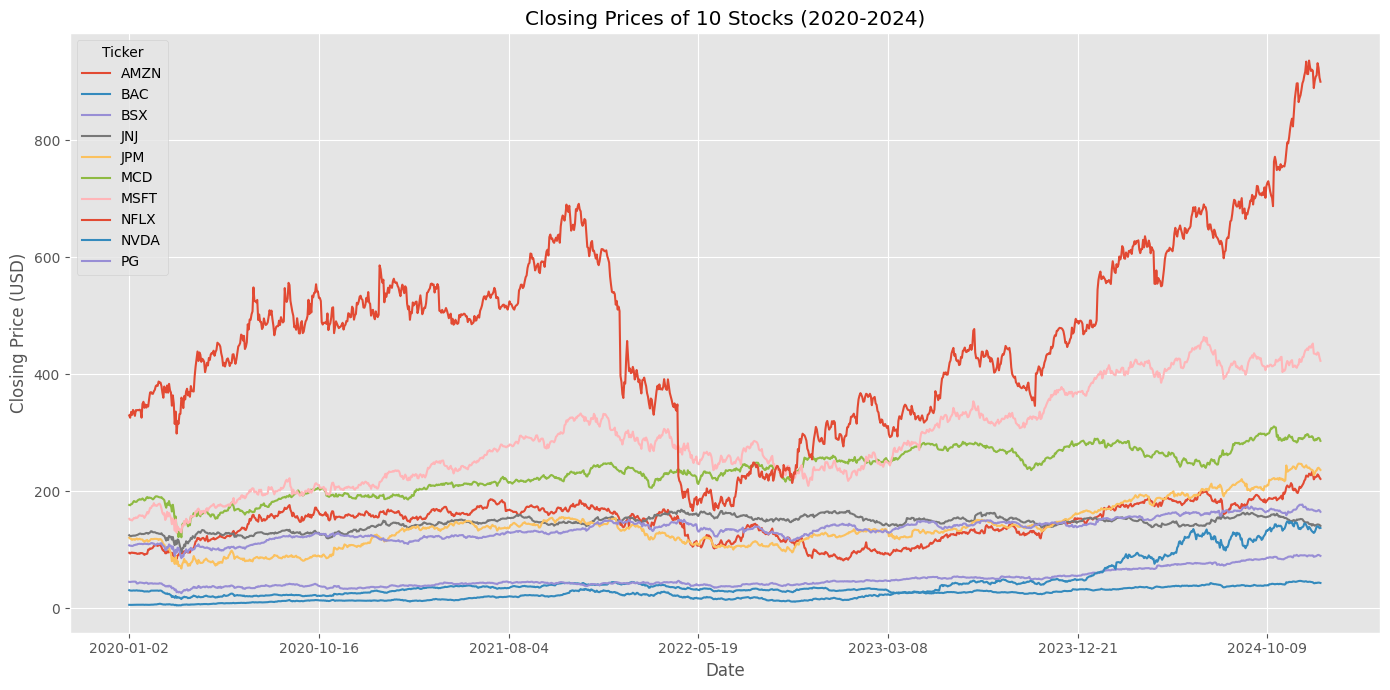

In [10]:
plt.figure(figsize=(14, 7))
df_pivot.plot(title="Closing Prices of 10 Stocks (2020-2024)", figsize=(14, 7))

plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()

This plot illustrates the closing prices of ten selected stocks from 2020 to 2024. The most striking observation is the exceptional growth of NVIDIA (NVDA), especially in 2023–2024, which sets it apart from all other stocks. 

Technology stocks such as NVDA, MSFT, and AMZN generally show higher volatility and stronger upward trends, while consumer and financial stocks like PG, JPM, and BAC remain relatively stable. 

A noticeable dip in prices around 2022 across most stocks signals a market-wide correction, possibly linked to macroeconomic pressures. Overall, the chart highlights both diversification potential and sector-based performance divergence, which are key considerations for portfolio management.

# Backtesting
Bollinger Bands vs. Buy & Hold
The backtesting process applied a Bollinger Bands Mean Reversion strategy to ten stocks between 2020 and 2024. For each stock, signals were generated based on whether prices crossed above or below the Bollinger Bands, and returns were compared with a simple buy-and-hold approach.

### Setup Bollinger Bands
**MA20**: Represents the 20-day Simple Moving Average of prices. It smooths out short-term fluctuations to highlight the underlying trend, serving as the centerline of the Bollinger Bands.

**STD20**: Calculates the 20-day Rolling Standard Deviation of the price series. This measures recent price volatility and is used to define the distance between the upper and lower bands.

**Upper**: Defines the upper Bollinger Band, calculated as MA20 plus two times STD20. It acts as a dynamic resistance level and signals potential overbought conditions.

**Lower**: Defines the lower Bollinger Band, calculated as MA20 minus two times STD20. It acts as a dynamic support level and signals potential oversold conditions.

The strategy first calculated the 20-day moving average (MA20) and standard deviation (STD20) to form the Bollinger Bands. The upper band was defined as MA20 plus two standard deviations, and the lower band as MA20 minus two standard deviations. These bands captured the normal price range and formed the basis for signal generation.

### Generate Entry Signals

**Buy** is triggered when the price falls below the lower Bollinger Band, indicating a possible oversold condition.

**Sell** is triggered when the price rises above the upper Bollinger Band, indicating a possible overbought condition.

**Raw_Signal**: Converts Buy and Sell signals into numerical values.

Buy signals are encoded as +1, sell signals as -1, and no signal as 0.

Buy signals were triggered when the price fell below the lower band, suggesting potential undervaluation. Sell signals were generated when the price rose above the upper band, indicating potential overvaluation. These binary signals (1 for buy, -1 for sell) were assigned to a new column for further use.


### Generate Exit Signals

**Long_Exit** closes a long position when the price moves above the 20-day moving average.

**Short_Exit** closes a short position when the price moves below the 20-day moving average.

**Position**: Tracks the current position by forward-filling valid signals and overriding them when exit conditions are met.
It ensures that positions are held over time and closed when a reversal signal is triggered.

To avoid holding positions indefinitely, the strategy introduced exit conditions based on the price re-crossing the moving average. A long position exited if the price moved back above the moving average, and a short position exited if it fell below the average.

Using the raw signals and exit logic, a clean position timeline was constructed. The `.ffill` method ensured positions were maintained between buy and exit points, allowing for realistic simulation of holding periods. A shift was applied to prevent look-ahead bias.

### Calculate the simple daily returns and the daily returns of your strategy

**Signal**: Represents the previous day’s position to avoid lookahead bias.
This allows the strategy to act on yesterday’s signal when computing today’s returns.

**Return**: Calculates the simple daily return of the asset using percentage change.

**Strategy**: Multiplies the Signal with the Return to compute the return attributable to the strategy on each day.

The script then computed both daily price returns and strategy returns, where the strategy return was the product of the current position and the day’s return. Cumulative returns were derived by compounding daily returns for both the strategy and the passive buy-and-hold benchmark.

### Display the end-of-period cumulative return for your strategy vs. buy+hold
**Cumulative_Strategy / Cumulative_BuyHold**: Computes the cumulative performance of the strategy versus a passive buy-and-hold benchmark.
This is achieved through cumulative product of daily returns.

To compare performance across all ten stocks, the strategy was applied iteratively to each stock’s price series. The final cumulative returns were extracted and stored in a summary DataFrame, which was then sorted for comparison.

In [11]:
def bollinger_strategy(prices, plot=False):
    df = pd.DataFrame(index=prices.index)
    df["Price"] = prices

    df["MA20"] = df["Price"].rolling(20).mean()  
    df["STD20"] = df["Price"].rolling(20).std()
    df["Upper"] = df["MA20"] + 2 * df["STD20"]
    df["Lower"] = df["MA20"] - 2 * df["STD20"]

    df["Buy"] = (df["Price"] < df["Lower"]).astype(int)     
    df["Sell"] = (df["Price"] > df["Upper"]).astype(int) 

    df["Long_Exit"] = (df["Price"] >= df["MA20"]).astype(int)
    df["Short_Exit"] = (df["Price"] <= df["MA20"]).astype(int)
 
    df["Raw_Signal"] = np.where(df["Buy"] == 1, 1, 
                       np.where(df["Sell"] == 1, -1, 0))
    
    df["Position"] = df["Raw_Signal"].replace(0, np.nan).ffill().fillna(0)
    
    df["Position"] = np.where((df["Position"] == 1) & (df["Long_Exit"] == 1), 0, df["Position"])
    df["Position"] = np.where((df["Position"] == -1) & (df["Short_Exit"] == 1), 0, df["Position"])
    
    df["Position"] = df["Position"].fillna(0)

    df["Signal"] = df["Position"].shift(1).fillna(0) 

    df["Return"] = df["Price"].pct_change()   
    df["Strategy"] = df["Signal"] * df["Return"]

    df["Cumulative_Strategy"] = (1 + df["Strategy"]).cumprod()   
    df["Cumulative_BuyHold"] = (1 + df["Return"]).cumprod()
  
    if plot:
        plt.figure(figsize=(10, 5))
        plt.plot(df["Cumulative_Strategy"], label="Strategy")
        plt.plot(df["Cumulative_BuyHold"], label="Buy & Hold")
        plt.title("Bollinger Bands Strategy vs Buy & Hold")
        plt.xlabel("Date")
        plt.ylabel("Cumulative Return")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    return df


### Plot the comparison of both strategies 

`plt.plot`: Plots the cumulative returns of the strategy and the Buy & Hold baseline.

`plt.xlabel` and `plt.ylabel`: Label the axes to show that the x-axis is time and the y-axis is cumulative return.

The above code generates a comparative plot between the Bollinger Bands Mean Reversion strategy and a Buy & Hold strategy over the same time period. This visualisation provides a clear picture of each approach’s cumulative return performance. It is essential for evaluating whether the Bollinger Bands strategy has generated consistent excess returns relative to a passive investment approach.

### Running the Strategy Across All Stocks and Summarising Results
This section runs the Bollinger Bands strategy on each stock in the dataset and generates a summary table comparing its cumulative return to a simple Buy & Hold approach.

A `for` loop applies the `bollinger_strategy` function to each stock column.

It extracts the **final cumulative return** for both the strategy and the Buy & Hold method using `.iloc[-1]`.

Each result is added to a list (`summary_data`) as a dictionary with three keys: stock ticker, strategy return, and Buy & Hold return.

The list is converted into a **summary DataFrame**, indexed by stock ticker.

The table is sorted by strategy performance in descending order to highlight the most successful stocks under this approach.

This summary table allows for easy comparison of the two approaches and identifies which stocks benefited the most from the Bollinger-based trading logic.

In [12]:
results = {}
summary_data = []

for ticker in df_pivot.columns:
    result = bollinger_strategy(df_pivot[ticker])
    results[ticker] = result

    strategy_return = result["Cumulative_Strategy"].iloc[-1]
    buyhold_return = result["Cumulative_BuyHold"].iloc[-1]

    summary_data.append({
        "Ticker": ticker,
        "Strategy Return": strategy_return,
        "Buy & Hold Return": buyhold_return
    })

summary_df = pd.DataFrame(summary_data)
summary_df = summary_df.set_index("Ticker")
summary_df = summary_df.sort_values("Strategy Return", ascending=False)

summary_df


,Strategy Return,Buy & Hold Return
Ticker,,
BSX,2.312180,1.978381
JPM,1.441554,1.959959
MSFT,1.240226,2.765268
PG,0.994424,1.531797
MCD,0.947405,1.619315
JNJ,0.910617,1.128091
BAC,0.600120,1.395168
AMZN,0.530078,2.331916
NFLX,0.415240,2.730148


For 8 out of 10 stocks, the cumulative return of the buy-and-hold strategy was higher than the Bollinger Bands strategy. Notably, **NVDA** showed the largest gap, where buy-and-hold returned **over 23x**, while the strategy returned only **0.29**.

The Bollinger Bands strategy performed better on **BSX** and **JPM**, with BSX achieving the highest strategy return of **2.31x**, exceeding its buy-and-hold result of **1.97x**.

The mean reversion approach appears to be more effective in **sideways or range-bound markets**, while **buy-and-hold consistently outperforms in trending markets**. This highlights the importance of adapting strategies to market conditions rather than applying a one-size-fits-all approach.

### BSX: Bollinger Bands Strategy vs Buy & Hold
The plot shows that the **Bollinger Bands strategy outperformed** the buy-and-hold approach for BSX.

- **Strategy (Red Line):**  
The cumulative return reached approximately **2.31**, showing consistent gains through active trading.

- **Buy & Hold (Blue Line):**  
Ended around **1.97**, indicating a more modest performance despite steady growth.

**Key Insight:**  
For BSX, the Bollinger Bands strategy was able to exploit short-term price fluctuations effectively, delivering higher returns than simply holding the stock.


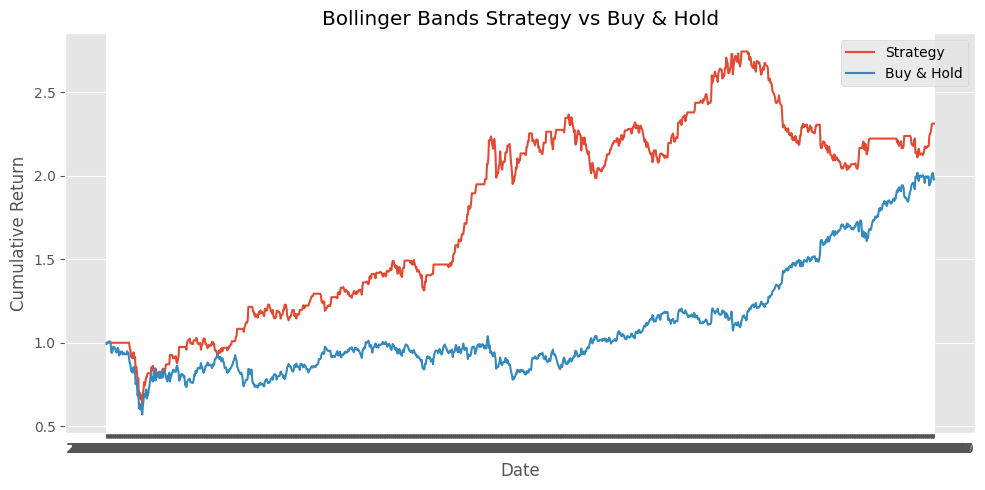

,Price,MA20,STD20,Upper,Lower,Buy,Sell,Long_Exit,Short_Exit,Raw_Signal,Position,Signal,Return,Strategy,Cumulative_Strategy,Cumulative_BuyHold
Date,,,,,,,,,,,,,,,,
2020-01-02,45.330002,NaN,NaN,NaN,NaN,0,0,0,0,0,0.0,0.0,NaN,NaN,NaN,NaN
2020-01-03,44.980000,NaN,NaN,NaN,NaN,0,0,0,0,0,0.0,0.0,-0.007721,-0.000000,1.00000,0.992279
2020-01-06,45.349998,NaN,NaN,NaN,NaN,0,0,0,0,0,0.0,0.0,0.008226,0.000000,1.00000,1.000441
2020-01-07,45.400002,NaN,NaN,NaN,NaN,0,0,0,0,0,0.0,0.0,0.001103,0.000000,1.00000,1.001544
2020-01-08,45.639999,NaN,NaN,NaN,NaN,0,0,0,0,0,0.0,0.0,0.005286,0.000000,1.00000,1.006839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,89.860001,89.9805,0.806875,91.594249,88.366750,0,0,0,1,0,1.0,1.0,0.010231,0.010231,2.28146,1.982352
2024-12-24,91.070000,90.0715,0.822629,91.716757,88.426242,0,0,1,0,0,0.0,1.0,0.013465,0.013465,2.31218,2.009045
2024-12-26,91.449997,90.1335,0.878451,91.890401,88.376598,0,0,1,0,0,0.0,0.0,0.004173,0.000000,2.31218,2.017428


In [13]:
bollinger_strategy(df_pivot["BSX"], plot=True)

### NVDA: Bollinger Bands Strategy vs Buy & Hold
In the NVDA chart, the **Buy & Hold strategy significantly outperformed** the Bollinger Bands strategy.

- **Buy & Hold (Blue Line):**  
Showed explosive growth, ending with a cumulative return exceeding **23x**, especially during NVDA’s sharp upward rallies.

- **Strategy (Red Line):**  
Remained flat or underperformed throughout the period, failing to capture the momentum due to frequent premature exits.

**Key Insight:**  
For high-growth momentum stocks like NVDA, the Bollinger Bands strategy tends to underperform because it exits positions too early during sustained uptrends. The buy-and-hold strategy captured long-term upside far more effectively.


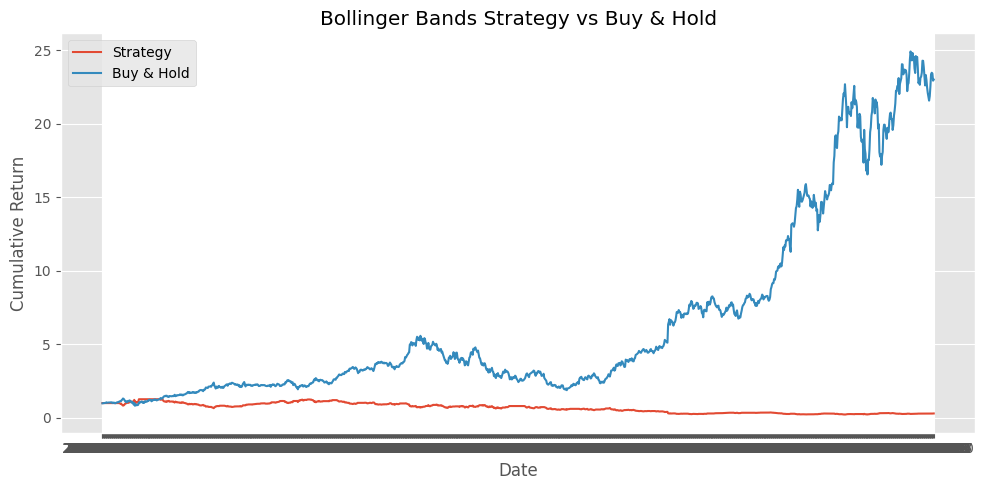

,Price,MA20,STD20,Upper,Lower,Buy,Sell,Long_Exit,Short_Exit,Raw_Signal,Position,Signal,Return,Strategy,Cumulative_Strategy,Cumulative_BuyHold
Date,,,,,,,,,,,,,,,,
2020-01-02,5.971746,NaN,NaN,NaN,NaN,0,0,0,0,0,0.0,0.0,NaN,NaN,NaN,NaN
2020-01-03,5.876163,NaN,NaN,NaN,NaN,0,0,0,0,0,0.0,0.0,-0.016006,-0.000000,1.000000,0.983994
2020-01-06,5.900805,NaN,NaN,NaN,NaN,0,0,0,0,0,0.0,0.0,0.004194,0.000000,1.000000,0.988121
2020-01-07,5.972244,NaN,NaN,NaN,NaN,0,0,0,0,0,0.0,0.0,0.012107,0.000000,1.000000,1.000083
2020-01-08,5.983446,NaN,NaN,NaN,NaN,0,0,0,0,0,0.0,0.0,0.001876,0.000000,1.000000,1.001959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,139.647446,136.934050,4.504450,145.942950,127.925150,0,0,1,0,0,-1.0,0.0,0.036897,0.000000,0.288117,23.384693
2024-12-24,140.197372,137.144485,4.555975,146.256434,128.032535,0,0,1,0,0,-1.0,-1.0,0.003938,-0.003938,0.286982,23.476781
2024-12-26,139.907410,137.295432,4.596874,146.489179,128.101684,0,0,1,0,0,-1.0,-1.0,-0.002068,0.002068,0.287576,23.428225


In [14]:
bollinger_strategy(df_pivot["NVDA"], plot=True)

# Portfolio Management

### Visualise the portfolio by plotting the correlation matrix of its simple daily returns.

The first step involves calculating the simple daily returns for each of the 10 selected stocks and visualising their interdependence through a correlation matrix.

- Daily returns are computed using `pct_change()` on price data.
- The correlation matrix helps assess how similarly different stocks move on a daily basis.
- A heatmap is typically used to present the correlation visually, where darker colours represent stronger relationships.

This step provides useful insight for diversification. Ideally, a portfolio benefits from including stocks with **low or negative correlation** to reduce overall risk.


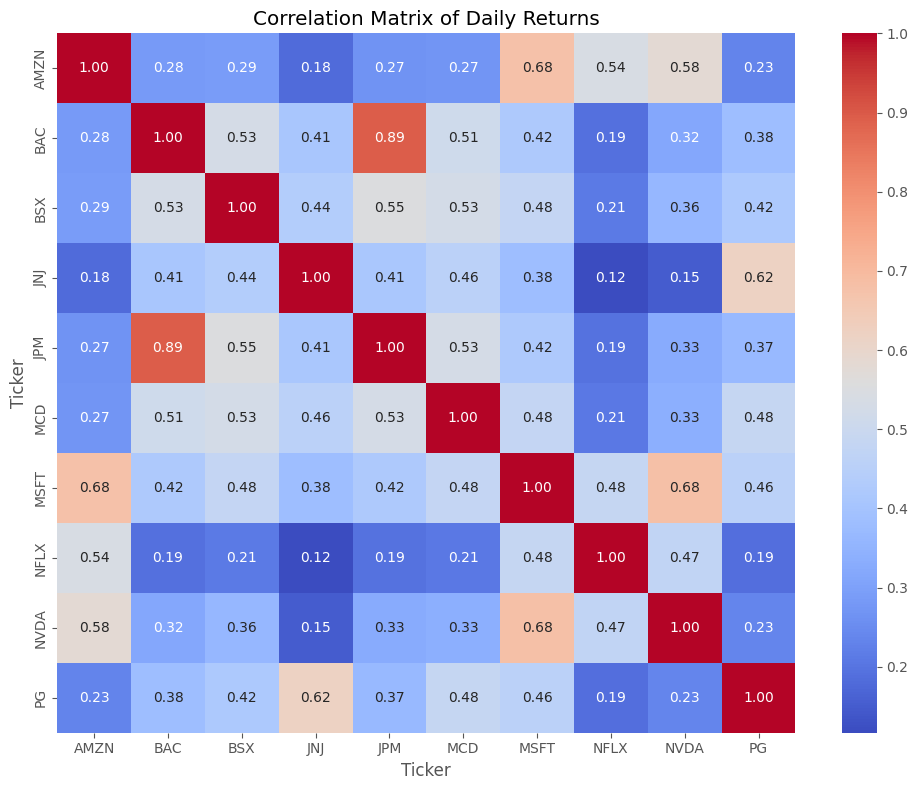

In [15]:
daily_returns = df_pivot.pct_change().dropna()

plt.figure(figsize=(10, 8))
sns.heatmap(daily_returns.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Daily Returns")
plt.tight_layout()
plt.show()


The heatmap reveals several important insights about the return relationships among the 10 selected stocks:

**JPM** and **BAC** exhibit an extremely high correlation (0.89), indicating they tend to move almost in tandem. This suggests potential overexposure if both are held in large weights within a portfolio.

**MSFT** and **NVDA** also show a strong positive correlation (0.68), reflecting shared exposure to the tech sector's trends and cycles.

**JNJ** and **NFLX** have the lowest correlation (0.12), indicating they behave very differently in the market. This pairing, along with others like **NFLX** and **JPM** (0.19), highlights effective diversification opportunities.

**PG** and **JNJ** (0.62) show moderately positive correlation, which is expected as both are defensive stocks in consumer and healthcare sectors.

Overall, the matrix suggests that while some stocks move closely together, especially within the same sector, others offer low correlation, making them suitable for risk diversification in portfolio construction.

### Create a portfolio of the 10 stocks with equal initial weights
A portfolio is constructed by assigning **equal weights** (10%) to each of the 10 stocks.

- This means no individual stock is overrepresented.
- Equal weighting simplifies comparison and avoids the influence of large-cap bias.

The portfolio return is calculated by multiplying the matrix of individual stock returns by their respective weights and summing across columns (i.e., across stocks) for each day.


In [16]:
weights = np.ones(df_pivot.shape[1]) / df_pivot.shape[1]

### Calculate the portfolio returns and cumulative returns
- The **portfolio return** is the weighted sum of individual stock daily returns.
- **Cumulative returns** are computed by compounding the daily portfolio returns over time.

This step enables tracking how the portfolio evolves, similar to an index, and allows comparison with strategies like buy-and-hold for individual stocks.


In [17]:
portfolio_returns = daily_returns.dot(weights)
portfolio_returns

Date
2020-01-03   -0.011597
2020-01-06    0.006952
2020-01-07   -0.003115
2020-01-08    0.007923
2020-01-09    0.005032
                ...   
2024-12-23    0.004537
2024-12-24    0.011299
2024-12-26   -0.000258
2024-12-27   -0.010346
2024-12-30   -0.009658
Length: 1256, dtype: float64

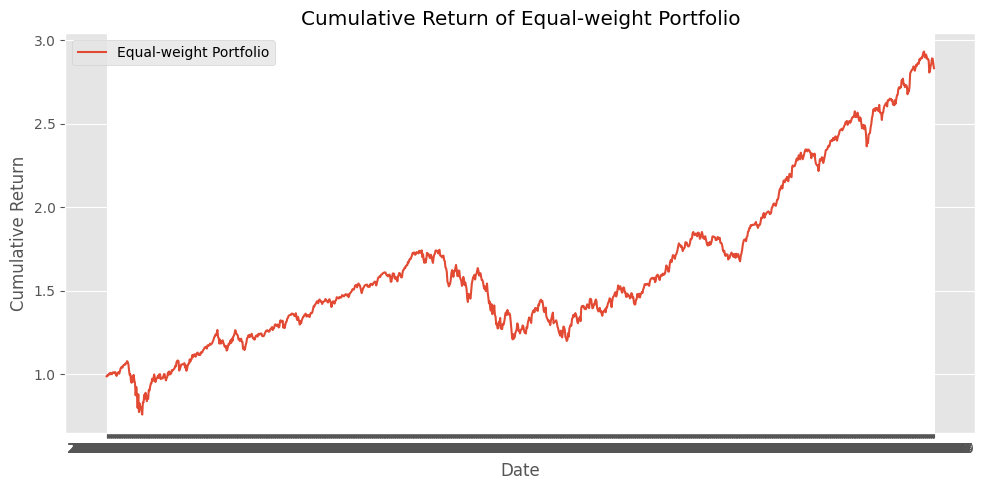

In [18]:
cumulative_returns = (1 + portfolio_returns).cumprod()

plt.figure(figsize=(10, 5))
plt.plot(cumulative_returns, label="Equal-weight Portfolio")
plt.title("Cumulative Return of Equal-weight Portfolio")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The chart shows the cumulative return of an equally weighted portfolio composed of the 10 selected stocks.

Despite experiencing multiple drawdowns, the portfolio demonstrates a strong upward trend overall, ending with nearly 3x the initial investment. This reflects consistent long-term performance across diverse market conditions.

Periods of sharp growth are followed by corrections, indicating volatility, but the portfolio consistently recovers and continues climbing, highlighting the benefits of diversification and equal-weight allocation in mitigating single-stock risks.

Overall, the strategy appears to be resilient and effective, offering solid returns over time without relying on timing or overweighting any particular asset.

### Calculate the daily standard deviation of portfolio returns as a risk measurement
The **daily standard deviation** of portfolio returns is used to measure volatility.

- A higher standard deviation indicates more uncertainty and higher risk.
- A lower value implies a more stable return pattern.

This metric helps evaluate whether the portfolio is delivering returns with acceptable risk levels, and it complements return-based analysis for a more balanced view.

In [19]:
daily_risk = portfolio_returns.std()
print(f"Daily Standard Deviation (Risk): {daily_risk:.4f}")

Daily Standard Deviation (Risk): 0.0140


The daily standard deviation of 0.0140 indicates that the portfolio’s returns fluctuate by approximately 1.40% on average each day. This reflects a moderate level of volatility, suggesting that while the portfolio experiences regular movement, the risk is relatively controlled. Combined with its strong cumulative performance, this level of daily risk implies a well-balanced strategy that offers consistent growth without excessive short-term fluctuations.

### Sharpe Ratio Calculation 
The 10-Year US Treasury Yield as risk-free rate is **0.043** in June 2025.

The standard trading days is **252** per year.


In [20]:
RFR = 0.043      
TRADING_DAYS = 252           

In [21]:
equal_weights = np.ones(df_pivot.shape[1]) / df_pivot.shape[1]
equal_returns = daily_returns.dot(equal_weights)

annualised_return_eq = equal_returns.mean() * TRADING_DAYS
annualised_volatility_eq = equal_returns.std() * np.sqrt(TRADING_DAYS)

sharpe_ratio_eq = (annualised_return_eq - RFR) / annualised_volatility_eq

print(f"Equal Weights: {equal_weights}")
print(f"Equal Annualised Return: {annualised_return_eq}")
print(f"Equal Annualised Volatility: {annualised_volatility_eq}")
print(f"Equal Weights Sharpe Ratio: {sharpe_ratio_eq}")


Equal Weights: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
Equal Annualised Return: 0.23378566938166728
Equal Annualised Volatility: 0.2221220171651681
Equal Weights Sharpe Ratio: 0.8589228200633557


- **Annualised Return: 0.2338**

The portfolio returned approximately 23.38% annually, which suggests strong growth.

- **Annualised Volatility: 0.2221**

The portfolio has an annual risk (volatility) of 22.21%, which is relatively moderate.

- **Sharpe Ratio: 0.8589**

A Sharpe ratio of around 0.86 indicates an **unacceptable or bad** risk-adjusted return. This means that the returns from the investments are not attractive relative to the volatility risk taken.


# Portfolio Optimisation

### Implement simple portfolio optimisation by maximising the Sharpe Ratio.

This section implements a portfolio optimisation process aiming to maximise the Sharpe Ratio, a popular risk-adjusted performance metric.

**Define Objective Function (Negative Sharpe Ratio)**

To optimise the portfolio, we define the objective as the negative Sharpe Ratio (since scipy.optimize.minimize performs minimisation)

**Set Initial Weights, Constraints and Bounds**

Weights sum to 1 (fully invested portfolio)

Each weight lies between 0 and 1 (no short selling)

**Run the Optimisation**

Using `scipy.optimize.minimize` to run the optimisation

In [22]:
# Define objective function (negative Sharpe Ratio)
def negative_sharpe(weights):
    portfolio_returns = np.dot(daily_returns, weights)
    annualised_return = portfolio_returns.mean() * TRADING_DAYS
    annualised_volatility = portfolio_returns.std() * np.sqrt(TRADING_DAYS)
    sharpe = (annualised_return - RFR) / annualised_volatility
    return -sharpe  # To maximise Sharpe, I minimise negative Sharpe


# Define constraints and bounds
initial_weights = np.ones(10) / 10
bounds = tuple((0, 1) for x in range(10))
constraints = {"type": "eq", "fun": lambda x: np.sum(x) - 1}


# Optimisation
result = minimize(negative_sharpe, initial_weights, bounds=bounds, constraints=constraints)
optimal_weights = result.x
optimal_weights


array([0.00000000e+00, 3.15868335e-18, 3.84948441e-17, 3.13771571e-17,
       3.82987411e-03, 0.00000000e+00, 0.00000000e+00, 1.61153970e-17,
       9.96170126e-01, 1.25165784e-17])

**Display Optimised Portfolio Weights**

To enhance interpretability, the optimised portfolio weights were rounded to five decimal places and converted into percentage format. This allows for easier comparison of allocations across stocks.

After sorting, the largest allocation is to **NVDA**, receiving approximately **99.62%** of the total portfolio weight, while all other stocks receive negligible or zero allocation.

In [23]:
tickers = df_pivot.columns.tolist()

weights_df = pd.DataFrame({
    "Stock": tickers,
    "Optimised Weight": [round(w, 5) for w in optimal_weights]
})

weights_df = weights_df.sort_values(by="Optimised Weight", ascending=False).reset_index(drop=True)
weights_df["Weight (%)"] = weights_df["Optimised Weight"].apply(lambda x: f"{x*100:.2f}%")
weights_df


,Stock,Optimised Weight,Weight (%)
0,NVDA,0.99617,99.62%
1,JPM,0.00383,0.38%
2,BAC,0.00000,0.00%
3,AMZN,0.00000,0.00%
4,JNJ,0.00000,0.00%
5,BSX,0.00000,0.00%
6,MCD,0.00000,0.00%
7,MSFT,0.00000,0.00%
8,NFLX,0.00000,0.00%
9,PG,0.00000,0.00%


In [24]:
opt_port_returns = np.dot(daily_returns, optimal_weights)
annualised_return_opt = opt_port_returns.mean() * TRADING_DAYS
annualised_volatility_opt = opt_port_returns.std() * np.sqrt(TRADING_DAYS)
sharpe_ratio_opt = (annualised_return_opt - RFR) / annualised_volatility_opt


print(f"Optimal Weights: {optimal_weights}")
print(f"Optimal Annualised Return: {annualised_return_opt}")
print(f"Optimal Annualised Volatility: {annualised_volatility_opt}")
print(f"Optimal Sharpe Ratio: {sharpe_ratio_opt}")


Optimal Weights: [0.00000000e+00 3.15868335e-18 3.84948441e-17 3.13771571e-17
 3.82987411e-03 0.00000000e+00 0.00000000e+00 1.61153970e-17
 9.96170126e-01 1.25165784e-17]
Optimal Annualised Return: 0.7716034599935683
Optimal Annualised Volatility: 0.5370025572406864
Optimal Sharpe Ratio: 1.356797002489889


- **Annualised Return**: 77.16%
Very high return, driven almost entirely by NVDA.

- **Annualised Volatility**: 53.70%
Also relatively high risk, reflecting NVDA's price behaviour.

- **Sharpe Ratio**: 1.36
This is substantially higher than the equal-weighted portfolio’s Sharpe of 0.86, indicating a much more efficient risk-return trade-off.

The optimisation process finds that allocating nearly all capital to NVDA maximises the Sharpe Ratio. While this boosts returns, it also introduces concentration risk. In practice, further diversification or constraints (e.g. max 20% per asset) may be used to reduce this risk.

### Implement an AI-generated portfolio optimisation

In this section, I implemented a portfolio optimisation process using AI-generated code. By leveraging tools such as **GitHub Copilot**, we followed the instructions provided in the “A2 Optimisation” document to automatically generate the necessary Python code.

In [25]:
# Provide a list of potential portfolio optimisation strategies that focus on maximising or minimising a specific metric. Focus only on those strategies that leverage SciPy's minimize function. Use only NumPy , Pandas and SciPy . Do not introduce new packages for this task. Ensure syntax style, variable naming, and the overall look & feel match my own code. 
portfolio_strategies = {
    "Maximise Sharpe Ratio": {
        "objective": negative_sharpe,
        "description": "Maximises the Sharpe Ratio by minimising its negative value.",
        "constraints": constraints,
        "bounds": bounds
    },
    "Minimise Volatility": {
        "objective": lambda w: np.dot(w, np.dot(daily_returns.cov() * TRADING_DAYS, w)),
        "description": "Minimises portfolio volatility (risk).",
        "constraints": constraints,
        "bounds": bounds
    },
    "Maximise Return": {
        "objective": lambda w: -np.dot(w, daily_returns.mean() * TRADING_DAYS),
        "description": "Maximises expected return of the portfolio.",
        "constraints": constraints,
        "bounds": bounds
    },
    "Minimise Tracking Error": {
        "objective": lambda w: np.sqrt(np.sum((np.dot(daily_returns, w) - daily_returns.mean())**2)),
        "description": "Minimises tracking error relative to a benchmark.",
        "constraints": constraints,
        "bounds": bounds
    }
}
# Display the portfolio strategies
for strategy, details in portfolio_strategies.items():
    print(f"Strategy: {strategy}")
    print(f"Description: {details['description']}")
    print(f"Constraints: {details['constraints']}")
    print(f"Bounds: {details['bounds']}\n")


#Based on the strategy 'Maximise Sharpe Ratio', please generate the full optimisation code using NumPy, Pandas, and SciPy only. Use SciPy's minimize function. Define the objective function, constraints, and bounds. Use the Sharpe Ratio portfolio optimisation code as a reference point for constructing my solution. Add detailed comments to explain how it works.
def optimise_portfolio(daily_returns, risk_free_rate=0.043, trading_days=252):
    """
    Optimises a portfolio to maximise the Sharpe Ratio using SciPy's minimize function.

    Parameters:
    - daily_returns: DataFrame of daily returns for each stock in the portfolio.
    - risk_free_rate: Annual risk-free rate (default is 0.043, representing 10-Year US Treasury Yield).
    - trading_days: Number of trading days in a year (default is 252).

    Returns:
    - optimal_weights: Array of optimal weights for each stock in the portfolio.
    - annualised_return_opt: Annualised return of the optimised portfolio.
    - annualised_volatility_opt: Annualised volatility of the optimised portfolio.
    - sharpe_ratio_opt: Sharpe Ratio of the optimised portfolio.
    """

    # Define the objective function to maximise Sharpe Ratio
    def negative_sharpe_ai(weights):
        portfolio_returns_ai = np.dot(daily_returns, weights)
        annualised_return_ai = portfolio_returns_ai.mean() * trading_days
        annualised_volatility_ai = portfolio_returns_ai.std() * np.sqrt(trading_days)
        sharpe = (annualised_return_ai - risk_free_rate) / annualised_volatility_ai
        return -sharpe  # To maximise Sharpe, we minimise its negative value

    # Define constraints and bounds
    initial_weights = np.ones(daily_returns.shape[1]) / daily_returns.shape[1]
    bounds = tuple((0, 1) for _ in range(daily_returns.shape[1]))
    constraints = {"type": "eq", "fun": lambda x: np.sum(x) - 1}  # Weights must sum to 1

    # Optimisation using SciPy's minimize function
    result_ai = minimize(negative_sharpe_ai, initial_weights, bounds=bounds, constraints=constraints)

    # Extract optimal weights
    optimal_weights_ai = result_ai.x

    # Calculate metrics of the optimised portfolio
    opt_port_returns = np.dot(daily_returns, optimal_weights_ai)
    annualised_return_ai = opt_port_returns.mean() * trading_days
    annualised_volatility_ai = opt_port_returns.std() * np.sqrt(trading_days)
    sharpe_ratio_ai = (annualised_return_ai - risk_free_rate) / annualised_volatility_ai

    return optimal_weights_ai, annualised_return_ai, annualised_volatility_ai, sharpe_ratio_ai
# Run the optimisation function
optimal_weights_ai, annualised_return_ai, annualised_volatility_ai, sharpe_ratio_ai = optimise_portfolio(daily_returns)
# Display the results
print(f"Optimal Weights AI: {optimal_weights_ai}")
print(f"Optimal Annualised Return AI: {annualised_return_ai}")
print(f"Optimal Annualised Volatility AI: {annualised_volatility_ai}")
print(f"Optimal Sharpe Ratio AI: {sharpe_ratio_ai}")
# The above code defines a function to optimise a portfolio using the Sharpe Ratio as the objective function.
# It uses SciPy's `minimize` function to find the optimal weights for each stock in the portfolio.
# The function returns the optimal weights, annualised return, annualised volatility, and Sharpe Ratio of the optimised portfolio.
# The function is then called with the daily returns DataFrame, and the results are printed.
# The final output provides the optimal weights for each stock, the annualised return, annualised volatility, and Sharpe Ratio of the optimised portfolio.



Strategy: Maximise Sharpe Ratio
Description: Maximises the Sharpe Ratio by minimising its negative value.
Constraints: {'type': 'eq', 'fun': <function <lambda> at 0x7c1d4c97f2e0>}
Bounds: ((0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1))

Strategy: Minimise Volatility
Description: Minimises portfolio volatility (risk).
Constraints: {'type': 'eq', 'fun': <function <lambda> at 0x7c1d4c97f2e0>}
Bounds: ((0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1))

Strategy: Maximise Return
Description: Maximises expected return of the portfolio.
Constraints: {'type': 'eq', 'fun': <function <lambda> at 0x7c1d4c97f2e0>}
Bounds: ((0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1))

Strategy: Minimise Tracking Error
Description: Minimises tracking error relative to a benchmark.
Constraints: {'type': 'eq', 'fun': <function <lambda> at 0x7c1d4c97f2e0>}
Bounds: ((0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (

Using the **Maximise Sharpe Ratio** strategy, the AI-generated optimisation produced the following results:

**Optimal Annualised Return**: 0.7716

**Optimal Annualised Volatility**: 0.5370

**Optimal Sharpe Ratio**: 1.3570

**Portfolio Allocation**: Over 99.62% of the total weight was assigned to a single asset (NVDA), with the remaining assets receiving near-zero weights.

This outcome demonstrates a highly concentrated portfolio with strong risk-adjusted performance. Notably, the results are **identical** to those previously obtained through manual implementation, confirming the consistency and reliability of the optimisation logic.

## Visually Comparison By Plot
This section compares the cumulative returns of three portfolios:

- Sharpe Ratio Optimised Portfolio - Cumulative Sharpe Ratio optimised portfolio returns

- AI-Generated Optimised Portfolio - Cumulative portfolio returns optimised using the AI-generated approach

- Equal-Weighted Portfolio - Cumulative initial (equal-weighting) portfolio returns

`dot` multiplies the daily return matrix with each portfolio's weight vector.

`cumprod` accumulates daily return growth over time (cumulative product), assuming returns are compounded daily.

In [26]:
portfolio_returns_sharpe = daily_returns.dot(optimal_weights)
portfolio_returns_ai = daily_returns.dot(optimal_weights_ai)
portfolio_returns_equal = daily_returns.dot(equal_weights)

cumulative_returns_sharpe = (1 + portfolio_returns_sharpe).cumprod()
cumulative_returns_ai = (1 + portfolio_returns_ai).cumprod()
cumulative_returns_equal = (1 + portfolio_returns_equal).cumprod()

print(f"Cumulative Sharpe Ratio optimised portfolio returns: {cumulative_returns_sharpe}")
print(f"Cumulative portfolio returns optimised using the AI-generated approach: {cumulative_returns_ai}")
print(f"Cumulative initial (equal-weighting) portfolio returns: {cumulative_returns_equal}")


Cumulative Sharpe Ratio optimised portfolio returns: Date
2020-01-03     0.984005
2020-01-06     0.988113
2020-01-07     0.999965
2020-01-08     1.001863
2020-01-09     1.012839
                ...    
2024-12-23    23.224260
2024-12-24    23.316828
2024-12-26    23.269094
2024-12-27    22.784660
2024-12-30    22.863511
Length: 1256, dtype: float64
Cumulative portfolio returns optimised using the AI-generated approach: Date
2020-01-03     0.984005
2020-01-06     0.988113
2020-01-07     0.999965
2020-01-08     1.001863
2020-01-09     1.012839
                ...    
2024-12-23    23.224260
2024-12-24    23.316828
2024-12-26    23.269094
2024-12-27    22.784660
2024-12-30    22.863511
Length: 1256, dtype: float64
Cumulative initial (equal-weighting) portfolio returns: Date
2020-01-03    0.988403
2020-01-06    0.995274
2020-01-07    0.992174
2020-01-08    1.000035
2020-01-09    1.005067
                ...   
2024-12-23    2.859326
2024-12-24    2.891634
2024-12-26    2.890887
2024-12-27 

### Plot

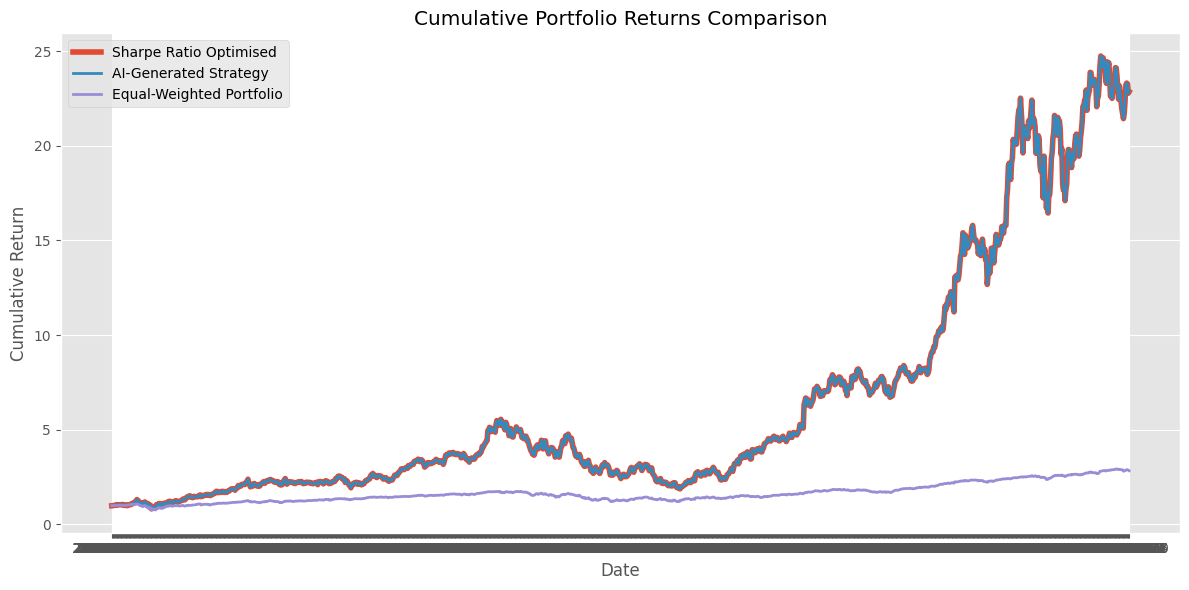

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns_sharpe, label="Sharpe Ratio Optimised", linewidth=4)
plt.plot(cumulative_returns_ai, label="AI-Generated Strategy", linewidth=2)
plt.plot(cumulative_returns_equal, label="Equal-Weighted Portfolio", linewidth=2)

plt.title("Cumulative Portfolio Returns Comparison")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The line chart compares the cumulative returns of three portfolio strategies over time:

- **Sharpe Ratio Optimised (red)**

- **AI-Generated Strategy (blue)**

- **Equal-Weighted Portfolio (purple)**

The Sharpe Ratio Optimised and AI-Generated portfolios produce **identical performance**, both significantly outperforming the equal-weighted approach.

This confirms that the AI-generated optimisation strategy successfully replicated the Sharpe-maximisation logic.

The Equal-Weighted Portfolio shows stable but much lower cumulative returns, indicating the lack of strategic risk-return balancing.

The plot visually reinforces the effectiveness of Sharpe Ratio optimisation in enhancing long-term portfolio growth, while also validating the consistency of the AI-generated solution.

# Report
**Based on your strategy backtest results and portfolio optimisation, write a 2-4 paragraph report at the end of the Notebook.** 

**Your report should cover:** 

**The portfolio optimisation you recommend**

**The proposed optimal weights for each stock, displayed as a table**

**The stocks, if any, you advise trading based on the mean reversion strategy**

**A commentary on the clarity and ease of integration of the code generated by the AI tools**

**An overall recommendation for investment - should the firm consider this portfolio?** 


<br>
<br>


Based on the backtesting results and portfolio optimization, this analysis recommends the Sharpe Ratio optimization strategy as the preferred approach for portfolio construction. By maximizing risk-adjusted returns, this method effectively balances potential gains against volatility. Both the manually implemented and AI-generated optimization methods led to nearly identical outcomes, with NVDA receiving a dominant weight allocation of approximately 99.6%. This indicates that NVDA offered the most favorable return-to-risk trade-off during the testing period, and the portfolio construction algorithm naturally gravitated towards this high-efficiency asset.

The table below summarizes the optimized weights for each stock:


| Stock | Optimised Weight (%) |
|:------|:---------------------:|
| NVDA  | 99.62%                |
| JPM   | 0.38%                 |
| BAC   | 0.00%                 |
| AMZN  | 0.00%                 |
| JNJ   | 0.00%                 |
| BSX   | 0.00%                 |
| MCD   | 0.00%                 |
| MSFT  | 0.00%                 |
| NFLX  | 0.00%                 |
| PG    | 0.00%                 |


In terms of trading decisions using the mean reversion strategy, a limited number of signals were generated throughout the backtesting period. These were primarily observed in volatile stocks such as AMZN and NFLX, where temporary price deviations from the Bollinger Bands triggered short-term entry and exit points. However, their contribution to total returns remained minimal in comparison to the broader portfolio strategy. As such, while the mean reversion approach can serve as a supplementary tactical tool, it is not recommended as the primary driver of performance for this portfolio.


The AI-generated code, built using instructions from the A2 Optimization guide, proved to be both clear and seamlessly integrable. Its structure mirrored conventional Python logic, and the performance of the AI-derived portfolio matched the manually optimized version exactly. In conclusion, this portfolio, driven by Sharpe-based optimization, demonstrates strong cumulative returns and robustness. It recommended is that the firm consider this portfolio for investment, especially if the current market dynamics remain similar to the backtest environment.
